In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lin
import random as random

In [147]:
direc='C:/Users/Bas/Google Drive/Bas Games/Analysis/'

fix_depth=np.loadtxt(direc + '../fix_depth_unocc.txt')
actual_moves=np.loadtxt(direc + 'Move statistics/move_stats_eye.txt')[:,4]
actual_moves=(actual_moves[None,:]==np.array(range(36))[:,None]).T
occupied_squares=np.loadtxt(direc + 'Eye movements/occupied_squares.txt')
subjects=np.loadtxt(direc + 'Move statistics/move_stats_eye.txt')[:,0]
uniform_unocc=(occupied_squares==0)/np.sum(occupied_squares==0,axis=1)[:,None]

ValueError: Wrong number of columns at line 1219

In [140]:
direc='C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Analysis/2_eye/histograms/temp/'

#eye_hist = [pd.read_csv(direc + 'eye ' + str(i) +'.csv', sep=',',header=0,).values[:,1:37].astype(float) 
# for i in range(10)]
eye_hist = [np.loadtxt(direc + '../eye bas ' + str(i) +'.txt') for i in range(10)]
#filtered_eye_hist = [pd.read_csv(direc + 'filtered eye ' + str(i) +'.csv', sep=',',header=0,).values[:,1:37].astype(float) 
# for i in range(10)]
mouse_hist = [pd.read_csv(direc + 'mouse ' + str(i) +'.csv', sep=',',header=0,).values[:,1:37].astype(float) 
 for i in range(10)]


In [3]:
ind=np.sum(fix_depth,axis=1)==0
fix_depth[ind,:]=np.repeat(uniform_unocc,36,axis=0)[ind,:]
fix_depth=fix_depth/np.sum(fix_depth,axis=1)[:,None]

In [83]:
fix_unocc=np.vstack(eye_hist)*(occupied_squares==0);
ind=np.sum(fix_unocc,axis=1)==0
fix_unocc[ind,:]=uniform_unocc[ind,:]
fix_unocc=fix_unocc/np.sum(fix_unocc,axis=1)[:,None]

In [111]:
X = np.vstack([x.flatten() for x in [uniform_unocc,actual_moves] + 
               [fix_depth[i::36] for i in range(35)]]).T
y=fix_unocc.flatten()

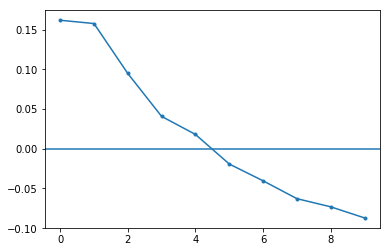

In [138]:
plt.plot([np.corrcoef((fix_unocc-uniform_unocc).flatten(),
                      fix_depth[i::36].flatten())[0,1] for i in range (0,10)],'.-')
plt.axhline(np.corrcoef((fix_unocc-uniform_unocc).flatten(),
                        uniform_unocc.flatten())[0,1])

plt.show()

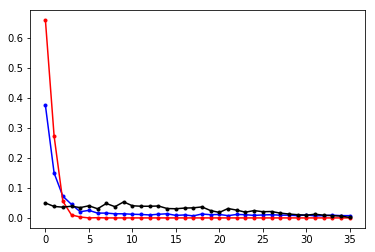

In [101]:
m=np.nonzero(actual_moves)[1]

ind=np.argsort(-fix_unocc*(occupied_squares==0)-0.001*np.random.rand(1311,36),axis=1)
plt.plot(np.mean(ind==m[:,None],axis=0),'.-b')
ind=np.argsort(-np.vstack(mouse_hist)*(occupied_squares==0)-0.001*np.random.rand(1311,36),axis=1)
plt.plot(np.mean(ind==m[:,None],axis=0),'.-r')
ind=np.argsort(-0.001*np.random.rand(1311,36)*(occupied_squares==0),axis=1)
plt.plot(np.mean(ind==m[:,None],axis=0),'.-k')

plt.show()

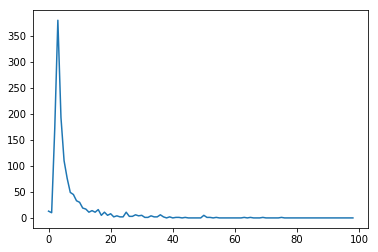

In [99]:
plt.plot(np.histogram(np.sum(fix_unocc*fix_depth[::36],axis=1),np.arange(0,1,0.01))[0])
plt.show()

In [105]:
def show_hists(i,n):
    plt.imshow(np.reshape(eye_hist[i][n,:],[4,9]), cmap='Reds', interpolation='nearest')
    plt.show()
    plt.imshow(np.reshape(filtered_eye_hist[i][n,:],[4,9]), cmap='Reds', interpolation='nearest')
    plt.show()
    plt.imshow(np.reshape(mouse_hist[i][n,:],[4,9]), cmap='Reds', interpolation='nearest')
    plt.show()

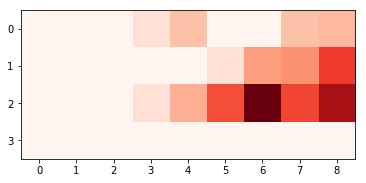

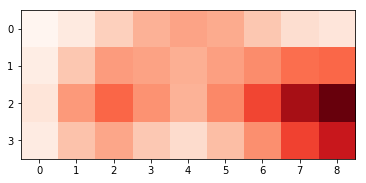

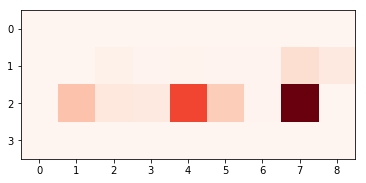

In [106]:
show_hists(3,15)

C:\Users\Bas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


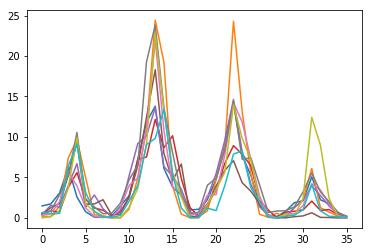

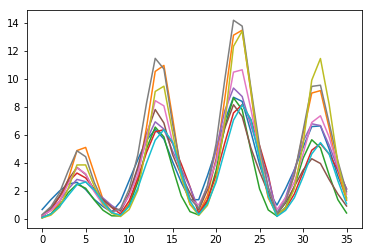

In [92]:
for e,f in zip(eye_hist,filtered_eye_hist):
    plt.plot(np.sum(e/np.sum(e,axis=1)[:,None],axis=0))
plt.show()

for e,f in zip(eye_hist,filtered_eye_hist):
    plt.plot(np.sum(f/np.sum(f,axis=1)[:,None],axis=0))
plt.show()    

In [145]:
plt.imshow(np.nanmean([np.corrcoef(filtered_eye_hist[i].T,eye_hist[i].T) for i in range(10)],axis=0))
plt.show()

for i in range(10):
    print(i)
    plt.imshow(np.corrcoef(filtered_eye_hist[i].T,eye_hist[i].T))
    plt.show()


C:\Users\Bas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Bas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [94]:
C=np.nanmean([np.corrcoef(filtered_eye_hist[i].T,eye_hist[i].T)[:36,36:] for i in range(10)],axis=0)

C:\Users\Bas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Bas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ValueError: all the input array dimensions except for the concatenation axis must match exactly